## PANDAS (contd.)

In [3]:
#update function in pandas
import pandas as pd
df1= pd.DataFrame([['Emil', 'Tobias', 'Linus'], [16,14,10]])
df2 = pd.DataFrame([['Emi'],[17]])
df1.update(df2)

In [2]:
df1

,0,1,2
0,Emi,Tobias,Linus
1,17,14,10


In [3]:
df3 = pd.DataFrame([['Some'],[20]])
df1.update(df3)  #updates first index by default
df1
#this is the disadvantage of update function

,0,1,2
0,Some,Tobias,Linus
1,20,14,10


### Merging Data in Pandas

In [4]:
left = pd.DataFrame({'id': [1,2,3,4,5], 
                     'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
                     'subject_id': ['sub1', 'sub2', 'sub4', 'sub6', 'sub5']})
right = pd.DataFrame({'id': [1,2,3,4,5], 
                     'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
                     'subject_id': ['sub2', 'sub4', 'sub3', 'sub6', 'sub5']})

In [5]:
left

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [6]:
right
#1st col is same, 2nd is completely different, 3rd is partially different

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


In [7]:
#to merge these dataframes
pd.merge(left, right)  #sequence matters

#we get an empty dataframe. WHY? because when you're merging two data 
#frames, you have to mention the column on the basis of which you are 
#merging them


,id,Name,subject_id


In [8]:
pd.merge(left, right, on = ['id'])  #sequence matters
#ONLY TWO DATAFRAMES CAN BE MERGED AT A TIME. also, _x is added to col names
#of first dataset and  _y is added to col names of second dataset 

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Bran,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


the **how argument** to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or the right tables, the values in the joined table will be NaN

In [9]:
#anothe argument in the function is  how: 'MergeHow' = 'inner'(default) 
#which means merge by intersection.
pd.merge(left, right, on = ['Name'])
#this is why we get an empty dataset when we merge on the basis of Name.

,id_x,Name,subject_id_x,id_y,subject_id_y


In [10]:
pd.merge(left, right, on = ['subject_id'])
#merging wrt partially similar data column 

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


In [11]:
pd.merge(left, right, on = ['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


In [12]:
pd.merge(left, right, on = ['subject_id'], how ='outer')
#outer means union of datasets

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


In [13]:
pd.merge(left, right, on = ['Name'], how ='outer')

,id_x,Name,subject_id_x,id_y,subject_id_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,NaN,NaN
2,3.0,Allen,sub4,NaN,NaN
3,4.0,Alice,sub6,NaN,NaN
4,5.0,Ayoung,sub5,NaN,NaN
5,NaN,Billy,NaN,1.0,sub2
6,NaN,Brian,NaN,2.0,sub4
7,NaN,Bran,NaN,3.0,sub3
8,NaN,Bryce,NaN,4.0,sub6
9,NaN,Betty,NaN,5.0,sub5


In [14]:
pd.merge(left, right, on = ['Name', 'id','subject_id'], how ='outer')
#completely merged into one dataset

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5
5,1,Billy,sub2
6,2,Brian,sub4
7,3,Bran,sub3
8,4,Bryce,sub6
9,5,Betty,sub5


In [15]:
pd.merge(left, right, on = ['subject_id'], how ='left')
#left means A-B (where  A is left datset here and B is right dataset here)

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


### NOTE: the left and right arguent in how is by default. it is NOT SAME as the name of datsets taken here as left and right

In [16]:
pd.merge(left, right, on = ['subject_id'], how ='right')
#B-A

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


## Descriptive Ststistics in Pandas

Descriptive statistics is a study of data analysis to describe, show or summarize data in a meaningful way. It involves the calculation of various measures such as the measure of centre, the measure of variability, percentiles and also the construction of tables and graphs.

**Types of Data:**
- **Categorical Data:** non-numerical(not always) information such as gender, race, religion, marital status, etc.
- **Numerical Data:** measurement or count such as height, weight, salary, age, number of children etc.

IMPORTANT
----
**VARIANCE**: THIS GIVES US THE EXPLANATION ABOUT THE DEVIATION IN DATA TO EITHER SIDES OF THE IDEAL/MEAN/CENTRAL DATA. THEREFORE THE PHYSICAL SIGNIFICANCE OF VARIANCE IS TO SHOW THE DEVIATION OF CASES WRT THE IDEAL/MOST GENERAL CASE, IE THE NEGATIVE AND POSITIVE VARIATION FROM THE MEAN DATA(AVG OR MOST COMMON DATA VALUE).

**STANDARD DEVIATION**: IS ROOT OVER VARIANCE- IT SIGNIFIES HOW MUCH THE DIFFERENT DATA VALUES IN THE DATASET IS DEVIATION/ VARYING FROM THE MEAN/MEDIAN/CENTRAL DATA VALUE. 
- SOMETIMES STANDARD DEVIATION IS CALCULATED ON THE BASIS OF MEAN, SOMETIMES MEDIAN DEPENDING ON THE REQUIREMENT.

**PERCENTAGE**: (TOTAL OF DVs/MAX OF DVs) * 100 --> IT IS THE PROCESS OF REDEFINING A COLLECTION OF NUMERIC DATA VALUES AS ONE ON A SCALE OF 0 TO 100, WITH 0 BEING THE LOWEST VALUE AND 100 BEING THE HIGHEST.

**PERCENTILE**: IT IS A TERM THAT DESCRIBES HOW A SCORE/DATA VALUE COMPARES TO OTHER SCORES/DVs FROM THE SAME DATASET. IT IS COMMONLY EXPRESSED AS THE PERCENTAGE OF VALUES IN A SET OF DVs THAT FALL BELOW A GIVEN VALUE.
- IN STATISTICS, A K-TH PERCENTILE IS A SCORE BELOW WHCH A GIVEN PERCENTAGE K OF SCORES IN IT'S FREQUENCY DISTRIBUTION FALLS OR A SCORE AT OR BELOW WHICH A GIVEN PERCENTAGE FALLS.
- **PERCENTILE** TELLS YOU THE RANK AND THE PERFORMANCE IN COMPARISON WITH OTHER SCORES/DVs. **PERCENTAGE** ONLY TELLS YOU ABOUT YOUR INDIVIDUAL PERFORMANCE.

**QUARTILES**: QUARTILES ARE THE VALUES THAT DIVIDE A LIST OF NUMERICAL DATA INTO THREE QUARTERS. THE MIDDLE PART OF THE THREE QUARTERS MEASURES THE CENTRAL POINT OF DISTRIBUTION AND SHOWS THE DATA WHICH ARE NEAR TO THE CENTRAL POINT. 
- IN STATISTICS, QUARTILE IS A TYPE OF QUANTILE WHICH DIVIDES THE DATA POINTS INTO FOUR PARTS, OR QUARTERS, OF MORE-OR-LESS EQUAL SIZE. THE DATA MUST BE ORDERED FROM SMALLEST TO LARGEST TO COMPUTE QUARTILES; AS SUCH, QUARTILES ARE A FORM OF ORDER STATISTIC.
- 0, 25TH QUARTILE, 50TH QUARTILE, 75TH QUARTILE, 100 --> 50TH QUARTILE IS REFERRED TO AS THE MEDIAN.
- **INTERQUARTILE RANGE(IQR)** --> Q3-Q1 (OR IN THIS CASE, 75-25): RANGE IS Q1 TO Q3. MEDIAN IS CENTRAL VALUE OF THIS RANGE.
- **OUTLIERS** ARE VALUES WHICH DO NOT RESONATE WITH THE REST OF THE VALUES PRESENT IN THE DATASET OR THEIR CHARACTERISTICS- CONSIDERED A FOREIGN MATERIAL. THEY DO NOT FOLLOW THW GENERAL PATTERN OR THE GENERAL TREND FOLLOWED BY THE REST OF THE POPULATION(DVs).
- ONE WAY OF CALCULATING OR FINDING OUT OUTLIERS ARE USING QUARTILES. AFTER FINDING THEM, **WE WILL DISCARD THE OUTLIERS SO AS TO KEEP THE DATA MORE REALISTIC.
- HOW TO CALCULATE OUTLIERS USING QUARTILES AND IQR? IQR(MIN)= Q1-1.5 * IQR AND IQR(MAX)= Q3+1.5 * IQR. ANYTHING OUTSIDE THIS RANGE ON EITHER SIDE IS CONSIDERED TO BE AN OUTLIER. NOTE: THE VALUE **1.5** IS NOT FIXED, IT VARIES ON THE BASIS OF DATA AND IS CALCULATED STATISTICALLY.

DESCRIPTIVE STATISTICS FUNCTIONS:
-----
- count() - number of non-null operations
- sum() - sum of values
- mean() - mean of values
- median() - median of values
- mode() - mode of values
- std() - Standard Deviation of the Values
- min() - minimum value
- max() - maximum value
- abs() - absolute value
- prod() - Product of values
- cumsum() - cumulative sum
- cumprod() - cumulative product

## Descriptive Statistics in Pandas

In [4]:
nba=pd.read_csv('nba.csv')
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [18]:
nba.Age.count()   #or nba['Age'].count()

457

In [46]:
nba[['Age']].count()

Age    457
dtype: int64

In [19]:
nba.count()

Name        457
Team        457
Number      457
Position    457
Age         457
Height      457
Weight      457
College     373
Salary      446
dtype: int64

In [20]:
nba.median(numeric_only= True)  
#default of numeric_only argument is False therefore it throws error

Number         13.0
Age            26.0
Weight        220.0
Salary    2839073.0
dtype: float64

In [21]:
nba.mean(numeric_only= True)

Number    1.767834e+01
Age       2.693873e+01
Weight    2.215230e+02
Salary    4.842684e+06
dtype: float64

In [22]:
nba.describe() 
#BY DEFAULT THIS FUNCTION GIVES A SUMMARY OF  NUMERICAL COLUMNS ONLY
#this function gives the count, mean, std and IQR values. 

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [23]:
nba.describe(percentiles = (0.1, 0.23, 0.57,0.85))

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
10%,2.000000,22.000000,186.000000,8.450590e+05
23%,5.000000,23.000000,200.000000,1.000000e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
57%,16.920000,27.000000,227.920000,3.415979e+06
85%,33.000000,31.600000,250.000000,1.048596e+07
max,99.000000,40.000000,307.000000,2.500000e+07


In [24]:
nba.describe(include = 'object')  
#include is an argument which is used to pass necessary information
#regarding what columns need to be considered for summarizing.
#takes object columns and gives result of the functions that are suitable

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Avery Bradley,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


In [25]:
nba.describe(include = 'all')  
#options are object, all or number(default)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,457,457,457.000000,457,457.000000,457,457.000000,373,4.460000e+02
unique,457,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.678337,NaN,26.938731,NaN,221.522976,NaN,4.842684e+06
std,NaN,NaN,15.966090,NaN,4.404016,NaN,26.368343,NaN,5.229238e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.044792e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.839073e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


## Handling Missing Data in Pandas
Missing data can occur when no information is provided for one or more items or for a whole unit. They can be referred to as NA(Not Available) values in pandas.

In Pandas missing data is represented by two value:
- None: None is a python singleton object that is often used for missing data in Python code.
- NaN: (acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.

In [27]:
import numpy as np
d = {'fs': [12,34,np.nan,15],
     'ss': [23,45,12,np.nan],
     'ts': [np.nan,12,18,20]}
df = pd.DataFrame(d)
df

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [28]:
df1 = df.copy()
df1

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [29]:
df1.isnull()

,fs,ss,ts
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [30]:
df1.notnull()

,fs,ss,ts
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [31]:
nba.count()

Name        457
Team        457
Number      457
Position    457
Age         457
Height      457
Weight      457
College     373
Salary      446
dtype: int64

In [32]:
nba.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
452,False,False,False,False,False,False,False,False,False
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False


In [35]:
nba.isnull().sum()  
#gives the count of all cells with null values for each column

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [34]:
nba.notnull().sum()  #equivalent to nba.count() (True=1, False=0)

Name        457
Team        457
Number      457
Position    457
Age         457
Height      457
Weight      457
College     373
Salary      446
dtype: int64

In [36]:
df1

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [37]:
df1.fillna(0) 
#does not mak changes to the dataframe, only gives output as required
#if we use the 'inplace' argument we can make the change permanent

,fs,ss,ts
0,12.0,23.0,0.0
1,34.0,45.0,12.0
2,0.0,12.0,18.0
3,15.0,0.0,20.0


In [38]:
df1  

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [39]:
df1.fs.fillna(0, inplace = True) 
#changes made permanently to the dataframe

In [40]:
df1

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,0.0,12.0,18.0
3,15.0,NaN,20.0


In [48]:
df1['ss'].fillna(df1['ss'].mean(), inplace = True)
df1

,fs,ss,ts
0,12.0,23.000000,NaN
1,34.0,45.000000,12.0
2,0.0,12.000000,18.0
3,15.0,26.666667,20.0


In [52]:
df

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [51]:
df2=df.copy()
df2.fillna(df2.mean())  #substitute mean of every column with NaN 

,fs,ss,ts
0,12.000000,23.000000,16.666667
1,34.000000,45.000000,12.000000
2,20.333333,12.000000,18.000000
3,15.000000,26.666667,20.000000


In [53]:
df2.fillna(method = 'bfill')
#bfill: backward fill--> the next value is filled to the NaN value

,fs,ss,ts
0,12.0,23.0,12.0
1,34.0,45.0,12.0
2,15.0,12.0,18.0
3,15.0,NaN,20.0


In [54]:
df2.fillna(method = 'ffill')  #forward fill

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,34.0,12.0,18.0
3,15.0,12.0,20.0


In [57]:
df2

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [58]:
df2.replace(12, 100)  #applied on the entire dataframe

,fs,ss,ts
0,100.0,23.0,NaN
1,34.0,45.0,100.0
2,NaN,100.0,18.0
3,15.0,NaN,20.0


In [59]:
df2.replace(np.nan,100)

,fs,ss,ts
0,12.0,23.0,100.0
1,34.0,45.0,12.0
2,100.0,12.0,18.0
3,15.0,100.0,20.0


In [60]:
df2.replace([np.nan,12], [100,105]) 
#replacing multiple DVs based on sequence. two lists: first contains values 
#to be replaced, second contains the replacements.

,fs,ss,ts
0,105.0,23.0,100.0
1,34.0,45.0,105.0
2,100.0,105.0,18.0
3,15.0,100.0,20.0


In [ ]:
df2.interpolate?
#used in statistics. will be covered later, go through it yourself

In [61]:
df2

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
2,NaN,12.0,18.0
3,15.0,NaN,20.0


In [62]:
df2.dropna() #will drop the entire row where there is a null dv

,fs,ss,ts
1,34.0,45.0,12.0


In [63]:
df2.dropna(subset = ['fs'])
#dropping based on a specific column

,fs,ss,ts
0,12.0,23.0,NaN
1,34.0,45.0,12.0
3,15.0,NaN,20.0


In [64]:
df2.dropna?
#see arguments

In [65]:
df2.dropna(axis = 1)

""
0
1
2
3


## Group Operations in Pandas
Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. Padas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [66]:
#example
dfr = pd.DataFrame({'Department': np.random.choice(['IT','HR','Sales','Production'], size = 50),
                    'Gender': np.random.choice(['Female','Male'], size = 50),
                    'Age': np.random.randint(25,55, size = 50),
                    'Salary': np.random.randint(25000, 90000, size = 50)})
dfr.index.name = 'emp_id'
dfr

,Department,Gender,Age,Salary
emp_id,,,,
0,HR,Female,40,73550
1,Production,Male,40,76484
2,Production,Male,28,79206
3,Sales,Female,53,38761
4,HR,Female,39,40518
5,HR,Male,28,63178
6,IT,Male,46,46604
7,IT,Female,33,40693
8,Production,Female,48,31225


In [69]:
dfr.groupby('Gender').mean(numeric_only = True).add_prefix('mean_')

,mean_Age,mean_Salary
Gender,,
Female,37.961538,53491.000000
Male,40.166667,56169.541667


In [107]:
dfr['Age'].groupby(dfr['Department']).describe().add_suffix('_age')

,count_age,mean_age,std_age,min_age,25%_age,50%_age,75%_age,max_age
Department,,,,,,,,
HR,12.0,35.666667,5.726070,28.0,31.0,35.0,40.00,45.0
IT,12.0,36.333333,7.643575,26.0,31.5,35.5,39.25,50.0
Production,11.0,39.545455,9.801670,25.0,32.0,40.0,46.00,54.0
Sales,15.0,43.466667,7.462924,29.0,40.0,46.0,49.00,53.0


In [108]:
dfr['Age'].groupby(dfr['Department']).first()

Department
HR            40
IT            46
Production    40
Sales         53
Name: Age, dtype: int32

In [70]:
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [72]:
nba.groupby('Team').count()

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,15,15,15,15,15,15,11,15
Boston Celtics,15,15,15,15,15,15,13,14
Brooklyn Nets,15,15,15,15,15,15,13,15
Charlotte Hornets,15,15,15,15,15,15,13,15
Chicago Bulls,15,15,15,15,15,15,12,15
Cleveland Cavaliers,15,15,15,15,15,15,12,14
Dallas Mavericks,15,15,15,15,15,15,12,15
Denver Nuggets,15,15,15,15,15,15,9,14
Detroit Pistons,15,15,15,15,15,15,15,15


In [73]:
nba.groupby('Team')['Position'].count()

Team
Atlanta Hawks             15
Boston Celtics            15
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             15
Cleveland Cavaliers       15
Dallas Mavericks          15
Denver Nuggets            15
Detroit Pistons           15
Golden State Warriors     15
Houston Rockets           15
Indiana Pacers            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Memphis Grizzlies         18
Miami Heat                15
Milwaukee Bucks           16
Minnesota Timberwolves    14
New Orleans Pelicans      19
New York Knicks           16
Oklahoma City Thunder     15
Orlando Magic             14
Philadelphia 76ers        15
Phoenix Suns              15
Portland Trail Blazers    15
Sacramento Kings          15
San Antonio Spurs         15
Toronto Raptors           15
Utah Jazz                 15
Washington Wizards        15
Name: Position, dtype: int64

In [74]:
nba.groupby('Team').mean(numeric_only = True)

,Number,Age,Weight,Salary
Team,,,,
Atlanta Hawks,19.000000,28.200000,221.266667,4.860197e+06
Boston Celtics,31.866667,24.733333,219.466667,4.181505e+06
Brooklyn Nets,18.266667,25.600000,215.600000,3.501898e+06
Charlotte Hornets,17.133333,26.133333,220.400000,5.222728e+06
Chicago Bulls,19.200000,27.400000,218.933333,5.785559e+06
Cleveland Cavaliers,14.466667,29.533333,227.866667,7.642049e+06
Dallas Mavericks,20.000000,29.733333,227.000000,4.746582e+06
Denver Nuggets,15.266667,25.733333,217.533333,4.294424e+06
Detroit Pistons,17.266667,26.200000,222.200000,4.477884e+06


In [84]:
nba.groupby('Position')['Salary'].mean()

Position
C     5.967052e+06
PF    4.562483e+06
PG    5.077829e+06
SF    4.857393e+06
SG    4.009861e+06
Name: Salary, dtype: float64

In [114]:
ab= pd.DataFrame(nba['Salary'].groupby(nba['Position']).mean())
ab
#same as above

,Salary
Position,
C,5.967052e+06
PF,4.562483e+06
PG,5.077829e+06
SF,4.857393e+06
SG,4.009861e+06


In [120]:
c = nba['Salary'].groupby(nba['Team']).describe()
c
#note that output is a dataframe

,count,mean,std,min,25%,50%,75%,max
Team,,,,,,,,
Atlanta Hawks,15.0,4.860197e+06,5.194508e+06,525093.0,1152260.00,2854940.0,6873239.50,18671659.0
Boston Celtics,14.0,4.181505e+06,3.146033e+06,1148640.0,1909560.00,3021242.5,6347087.75,12000000.0
Brooklyn Nets,15.0,3.501898e+06,5.317817e+06,134215.0,947276.00,1335480.0,2512675.00,19689000.0
Charlotte Hornets,15.0,5.222728e+06,4.538601e+06,189455.0,1543138.00,4204200.0,6665702.00,13500000.0
Chicago Bulls,15.0,5.785559e+06,6.251088e+06,525093.0,1203290.50,2380440.0,7974380.00,20093064.0
Cleveland Cavaliers,14.0,7.642049e+06,7.730329e+06,111196.0,1179457.00,4975000.0,12942843.75,22970500.0
Dallas Mavericks,15.0,4.746582e+06,5.030279e+06,525093.0,1185783.00,3950313.0,5289487.00,16407500.0
Denver Nuggets,14.0,4.294424e+06,4.320214e+06,258489.0,1615789.75,2907000.0,4142083.25,14000000.0
Detroit Pistons,15.0,4.477884e+06,4.668478e+06,111444.0,1711452.50,2891760.0,5635000.00,16000000.0


In [121]:
c.groupby('count').get_group(14)
#MORE IN-DEPTH ANALYSIS CAN BE DONE THIS WAY 

,count,mean,std,min,25%,50%,75%,max
Team,,,,,,,,
Boston Celtics,14.0,4.181505e+06,3.146033e+06,1148640.0,1909560.00,3021242.5,6347087.75,12000000.0
Cleveland Cavaliers,14.0,7.642049e+06,7.730329e+06,111196.0,1179457.00,4975000.0,12942843.75,22970500.0
Denver Nuggets,14.0,4.294424e+06,4.320214e+06,258489.0,1615789.75,2907000.0,4142083.25,14000000.0
Memphis Grizzlies,14.0,5.467920e+06,5.201676e+06,700902.0,1274280.00,4544009.5,8116000.00,19688000.0
Orlando Magic,14.0,4.297248e+06,3.068412e+06,845059.0,2311302.00,3956580.0,5144390.00,11250000.0
Philadelphia 76ers,14.0,2.213778e+06,1.900402e+06,525093.0,947276.00,1037084.5,3310710.00,6500000.0


In [82]:
nba.groupby('Position').mean(numeric_only = True).add_prefix('mean_')

,mean_Number,mean_Age,mean_Weight,mean_Salary
Position,,,,
C,21.807692,27.371795,254.205128,5.967052e+06
PF,23.570000,27.160000,240.430000,4.562483e+06
PG,10.967391,26.847826,189.478261,5.077829e+06
SF,17.611765,26.858824,221.776471,4.857393e+06
SG,14.852941,26.539216,206.686275,4.009861e+06


In [85]:
nt = nba.groupby('Team')
nt

In [86]:
nt.groups['San Antonio Spurs']  
#gives the index values where the team is present in the dataframe

Index([294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308],
      dtype='int64')

In [88]:
nt.get_group('San Antonio Spurs')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
294,LaMarcus Aldridge,San Antonio Spurs,12.0,PF,30.0,6-11,240.0,Texas,19689000.0
295,Kyle Anderson,San Antonio Spurs,1.0,SF,22.0,6-9,230.0,UCLA,1142880.0
296,Matt Bonner,San Antonio Spurs,15.0,C,36.0,6-10,235.0,Florida,947276.0
297,Boris Diaw,San Antonio Spurs,33.0,C,34.0,6-8,250.0,NaN,7500000.0
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6-11,250.0,Wake Forest,5250000.0
299,Manu Ginobili,San Antonio Spurs,20.0,SG,38.0,6-6,205.0,NaN,2814000.0
300,Danny Green,San Antonio Spurs,14.0,SG,28.0,6-6,215.0,North Carolina,10000000.0
301,Kawhi Leonard,San Antonio Spurs,2.0,SF,24.0,6-7,230.0,San Diego State,16407500.0
302,Boban Marjanovic,San Antonio Spurs,40.0,C,27.0,7-3,290.0,NaN,1200000.0
303,Kevin Martin,San Antonio Spurs,23.0,SG,33.0,6-7,199.0,Western Carolina,200600.0


In [89]:
nt.first()
#for each team, it gives the first datavalue of every column

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0
Cleveland Cavaliers,Matthew Dellavedova,8.0,PG,25.0,6-4,198.0,Saint Mary's,1147276.0
Dallas Mavericks,Justin Anderson,1.0,SG,22.0,6-6,228.0,Virginia,1449000.0
Denver Nuggets,Darrell Arthur,0.0,PF,28.0,6-9,235.0,Kansas,2814000.0
Detroit Pistons,Joel Anthony,50.0,C,33.0,6-9,245.0,UNLV,2500000.0


In [7]:
ntp = nba.groupby(['Team', 'Position'])

In [9]:
ntp.first()

Name  Number   Age Height  Weight  \
Team               Position                                                  
Atlanta Hawks      C               Al Horford    15.0  30.0   6-10   245.0   
                   PF          Kris Humphries    43.0  31.0    6-9   235.0   
                   PG         Dennis Schroder    17.0  22.0    6-1   172.0   
                   SF           Kent Bazemore    24.0  26.0    6-5   201.0   
                   SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0   
...                                       ...     ...   ...    ...     ...   
Washington Wizards C            Marcin Gortat    13.0  32.0   6-11   240.0   
                   PF             Drew Gooden    90.0  34.0   6-10   250.0   
                   PG          Ramon Sessions     7.0  30.0    6-3   190.0   
                   SF            Jared Dudley     1.0  30.0    6-7   225.0   
                   SG           Alan Anderson     6.0  33.0    6-6   220.0   

                                          College      Salary  
Team               Position                                    
Atlanta Hawks      C                      Florida  12000000.0  
                   PF                   Minnesota   1000000.0  
                   PG                 Wake Forest   1763400.0  
                   SF                Old Dominion   2000000.0  
                   SG                    Michigan   1304520.0  
...                                           ...         ...  
Washington Wizards C         North Carolina State  11217391.0  
                   PF                      Kansas   3300000.0  
                   PG                      Nevada   2170465.0  
                   SF              Boston College   4375000.0  
                   SG              Michigan State   4000000.0  

[149 rows x 7 columns]

In [97]:
ntp.groups['Atlanta Hawks', 'PF']

Index([313, 315, 316, 319], dtype='int64')

In [98]:
ntp.get_group(('Atlanta Hawks', 'PF'))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
313,Kris Humphries,Atlanta Hawks,43.0,PF,31.0,6-9,235.0,Minnesota,1000000.0
315,Paul Millsap,Atlanta Hawks,4.0,PF,31.0,6-8,246.0,Louisiana Tech,18671659.0
316,Mike Muscala,Atlanta Hawks,31.0,PF,24.0,6-11,240.0,Bucknell,947276.0
319,Mike Scott,Atlanta Hawks,32.0,PF,27.0,6-8,237.0,Virginia,3333333.0


In [100]:
ntp.mean(numeric_only = True)

Number        Age  Weight        Salary
Team               Position                                            
Atlanta Hawks      C         16.000000  28.333333  250.00  7.585417e+06
                   PF        27.500000  28.250000  239.50  5.988067e+06
                   PG         8.500000  24.500000  179.00  4.881700e+06
                   SF        24.500000  29.000000  210.50  3.000000e+06
                   SG        15.250000  29.500000  208.00  2.607758e+06
...                                ...        ...     ...           ...
Washington Wizards C         25.333333  30.666667  244.00  8.163476e+06
                   PF        47.500000  30.000000  247.50  5.650000e+06
                   PG         4.500000  27.500000  192.50  9.011208e+06
                   SF        12.500000  25.500000  208.25  2.789700e+06
                   SG         8.500000  27.250000  210.00  2.839248e+06

[149 rows x 4 columns]

In [102]:
nt['Salary'].agg([min, max, 'mean', 'count'])

,min,max,mean,count
Team,,,,
Atlanta Hawks,525093.0,18671659.0,4.860197e+06,15
Boston Celtics,1148640.0,12000000.0,4.181505e+06,14
Brooklyn Nets,134215.0,19689000.0,3.501898e+06,15
Charlotte Hornets,189455.0,13500000.0,5.222728e+06,15
Chicago Bulls,525093.0,20093064.0,5.785559e+06,15
Cleveland Cavaliers,111196.0,22970500.0,7.642049e+06,14
Dallas Mavericks,525093.0,16407500.0,4.746582e+06,15
Denver Nuggets,258489.0,14000000.0,4.294424e+06,14
Detroit Pistons,111444.0,16000000.0,4.477884e+06,15


In [122]:
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


## Filtering by Queries

In [123]:
nba[nba['Team']=='Boston Celtics']  #this is called a query

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [124]:
nba[nba['Age'] <= 20]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
13,James Young,Boston Celtics,13.0,SG,20.0,6-6,215.0,Kentucky,1749840.0
40,Kristaps Porzingis,New York Knicks,6.0,PF,20.0,7-3,240.0,NaN,4131720.0
56,Jahlil Okafor,Philadelphia 76ers,8.0,C,20.0,6-11,275.0,Duke,4582680.0
60,Christian Wood,Philadelphia 76ers,35.0,PF,20.0,6-11,220.0,UNLV,525093.0
62,Bruno Caboclo,Toronto Raptors,20.0,SF,20.0,6-9,205.0,NaN,1524000.0
85,Kevon Looney,Golden State Warriors,36.0,SF,20.0,6-9,220.0,UCLA,1131960.0
116,D'Angelo Russell,Los Angeles Lakers,1.0,PG,20.0,6-5,195.0,Ohio State,5103120.0
122,Devin Booker,Phoenix Suns,1.0,SG,19.0,6-6,206.0,Kentucky,2127840.0
192,Stanley Johnson,Detroit Pistons,3.0,SF,20.0,6-7,245.0,Arizona,2841960.0
208,Myles Turner,Indiana Pacers,33.0,PF,20.0,6-11,243.0,Texas,2357760.0


In [126]:
nba[(nba['Age'] > 24) & (nba['Age'] < 27)]
#NOTE THAT HERE WE ARE USING '&' INSTEAD OF 'and'. THIS IS BECAUSE HERE WE 
#ARE USING BOOLEAN ARRAY INDEXING WHICH OPERATES ON 0 AND 1, BUT MORE 
#IMPORTANTLY, WE ARE TESTING THE VALUES AT EACH AND EVERY INDEX BASED ON 
#THE CONDITIONS GIVEN. THEREFORE WE CAN USE BITWISE & HERE AND NOT LOGICAL 
#and. Wherever we get a True value, condition is satisfied therefore we use
#bitwise &.

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
14,Tyler Zeller,Boston Celtics,44.0,C,26.0,7-0,253.0,North Carolina,2616975.0
21,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,6-4,219.0,Cincinnati,134215.0
...,...,...,...,...,...,...,...,...,...
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [127]:
nba[(nba['Age'] == 25) | (nba['Age'] == 26)]
#same thing as above

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
14,Tyler Zeller,Boston Celtics,44.0,C,26.0,7-0,253.0,North Carolina,2616975.0
21,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,6-4,219.0,Cincinnati,134215.0
...,...,...,...,...,...,...,...,...,...
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


## GROUP OPERATIONS BASED ON QUERIES- IMPORTANT and VERY USEFUL
- can be used in removing OUTLIERS as well

In [128]:
nba[(nba['Team'] == 'Boston Celtics') & (nba.Position == 'PG')]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0
11,Isaiah Thomas,Boston Celtics,4.0,PG,27.0,5-9,185.0,Washington,6912869.0


In [130]:
automobile_data = pd.read_csv("https://raw.githubusercontent.com/rushabh-mehta/EDA-on-Automobile-Dataset/master/Automobile_data.csv")
automobile_data.to_csv('automobile_data.csv')

In [10]:
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                   'Embarked','Pclass','Cabin','PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [12]:
nba_PT = nba.groupby(['Position', 'Team']).count().drop(columns=['Number', 'Age', 'Height', 'Weight', 'College', 
                                                                 'Salary']).rename(columns={'Name':'Count'}).transpose()
nba_PT

Position             C                                                 \
Team     Atlanta Hawks Boston Celtics Brooklyn Nets Charlotte Hornets   
Count                3              3             2                 3   

Position                                                                    \
Team     Chicago Bulls Cleveland Cavaliers Dallas Mavericks Denver Nuggets   
Count                2                   3                3              3   

Position                                        ...                    SG  \
Team     Detroit Pistons Golden State Warriors  ... Oklahoma City Thunder   
Count                  3                     3  ...                     4   

Position                                                                       \
Team     Orlando Magic Philadelphia 76ers Phoenix Suns Portland Trail Blazers   
Count                3                  2            3                      5   

Position                                                               \
Team     Sacramento Kings San Antonio Spurs Toronto Raptors Utah Jazz   
Count                   4                 4               2         2   

Position                     
Team     Washington Wizards  
Count                     4  

[1 rows x 149 columns]

In [ ]:
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

([<matplotlib.axis.XTick at 0x2d4c0e07710>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'M')])

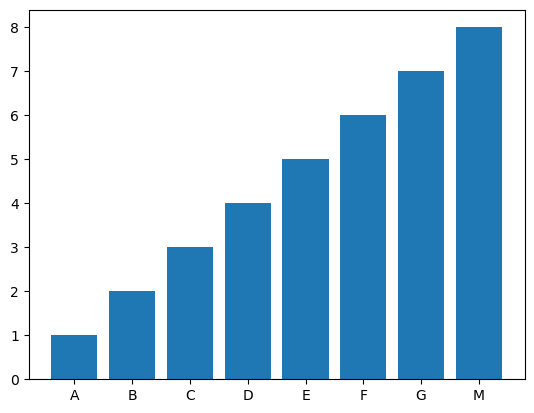

In [13]:
import numpy as np
import matplotlib.pyplot as plt
deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
bar_count = np.arange(len(deck_names))
y = pd.Series([1,2,3,4,5,6,7,8])
plt.bar(bar_count,y)
plt.xticks(bar_count, deck_names)
#plt.xticks?
#plt.tick_params?

<BarContainer object of 8 artists>

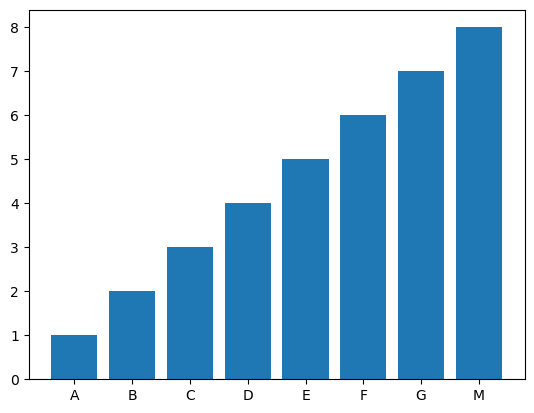

In [15]:
import numpy as np
import matplotlib.pyplot as plt
deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
#bar_count = np.arange(len(deck_names))  #pointless
y = pd.Series([1,2,3,4,5,6,7,8])
plt.bar(deck_names,y)
#plt.xticks(bar_count, deck_names)

In [20]:
position = nba['Position'].value_counts()
position

Position
SG    102
PF    100
PG     92
SF     85
C      78
Name: count, dtype: int64

In [25]:
position = nba['Position'].value_counts()['PG']
position

92